In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv('Ascendeum_Dataset2.csv')

In [7]:
df.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30 00:00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30 00:00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [9]:
df.tail()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
567286,2019-06-01 00:00:00,350,10,187,3,79,3456,20,59,1,19,5168,12,0.0254,4,12,1
567287,2019-06-01 00:00:00,350,10,187,1,79,3456,20,56,1,19,5168,68,0.3400,52,66,1
567288,2019-06-01 00:00:00,350,10,158,1,79,3456,20,56,1,19,5168,2,0.0046,0,2,1
567289,2019-06-01 00:00:00,350,10,33,1,79,3456,20,56,1,19,5168,6,0.0120,0,6,1
567290,2019-06-01 00:00:00,350,10,11,1,79,3456,20,56,1,19,5168,12,0.0240,12,12,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  int64  
 2   ad_type_id               567291 non-null  int64  
 3   geo_id                   567291 non-null  int64  
 4   device_category_id       567291 non-null  int64  
 5   advertiser_id            567291 non-null  int64  
 6   order_id                 567291 non-null  int64  
 7   line_item_type_id        567291 non-null  int64  
 8   os_id                    567291 non-null  int64  
 9   integration_type_id      567291 non-null  int64  
 10  monetization_channel_id  567291 non-null  int64  
 11  ad_unit_id               567291 non-null  int64  
 12  total_impressions        567291 non-null  int64  
 13  total_revenue            567291 non-null  float64
 14  view

In [13]:
df.isnull().sum()

date                       0
site_id                    0
ad_type_id                 0
geo_id                     0
device_category_id         0
advertiser_id              0
order_id                   0
line_item_type_id          0
os_id                      0
integration_type_id        0
monetization_channel_id    0
ad_unit_id                 0
total_impressions          0
total_revenue              0
viewable_impressions       0
measurable_impressions     0
revenue_share_percent      0
dtype: int64

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     567291 non-null  datetime64[ns]
 1   site_id                  567291 non-null  int64         
 2   ad_type_id               567291 non-null  int64         
 3   geo_id                   567291 non-null  int64         
 4   device_category_id       567291 non-null  int64         
 5   advertiser_id            567291 non-null  int64         
 6   order_id                 567291 non-null  int64         
 7   line_item_type_id        567291 non-null  int64         
 8   os_id                    567291 non-null  int64         
 9   integration_type_id      567291 non-null  int64         
 10  monetization_channel_id  567291 non-null  int64         
 11  ad_unit_id               567291 non-null  int64         
 12  total_impression

In [19]:
df.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [21]:
df.drop(columns=['order_id', 'line_item_type_id'], inplace=True)

In [23]:
df


,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30,351,10,187,2,84,60,1,4,5174,16,0.0000,2,16,1
1,2019-06-30,351,10,187,2,84,58,1,4,5174,6,0.0000,0,6,1
2,2019-06-30,351,10,147,2,84,60,1,4,5174,4,0.0000,0,4,1
3,2019-06-30,351,10,147,2,84,58,1,4,5174,4,0.0000,0,4,1
4,2019-06-30,348,10,147,3,79,59,1,19,5138,4,0.0000,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,2019-06-01,350,10,187,3,79,59,1,19,5168,12,0.0254,4,12,1
567287,2019-06-01,350,10,187,1,79,56,1,19,5168,68,0.3400,52,66,1
567288,2019-06-01,350,10,158,1,79,56,1,19,5168,2,0.0046,0,2,1
567289,2019-06-01,350,10,33,1,79,56,1,19,5168,6,0.0120,0,6,1


In [25]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

In [29]:
# Aggregate daily revenue (sum across all dimensions for each day)
daily_revenue = df.groupby('date')['total_revenue'].sum()

In [31]:
daily_revenue

date
2019-06-01    1086.5420
2019-06-02    1338.1880
2019-06-03    1556.1432
2019-06-04    1291.0508
2019-06-05    1143.2104
2019-06-06    1479.0596
2019-06-07    1283.5674
2019-06-08    1007.7296
2019-06-09    1297.3322
2019-06-10    1352.2488
2019-06-11    1132.2202
2019-06-12     893.4894
2019-06-13    1445.9134
2019-06-14    1284.1234
2019-06-15     921.8772
2019-06-16    1298.3964
2019-06-17    1642.9424
2019-06-18    1342.2158
2019-06-19    1130.2078
2019-06-20    1673.1862
2019-06-21    1699.3080
2019-06-22    1311.9500
2019-06-23    1538.3986
2019-06-24    1793.9588
2019-06-25    1339.1838
2019-06-26    1003.6166
2019-06-27    1527.0766
2019-06-28    1360.7644
2019-06-29    1107.3680
2019-06-30    1281.8502
Name: total_revenue, dtype: float64

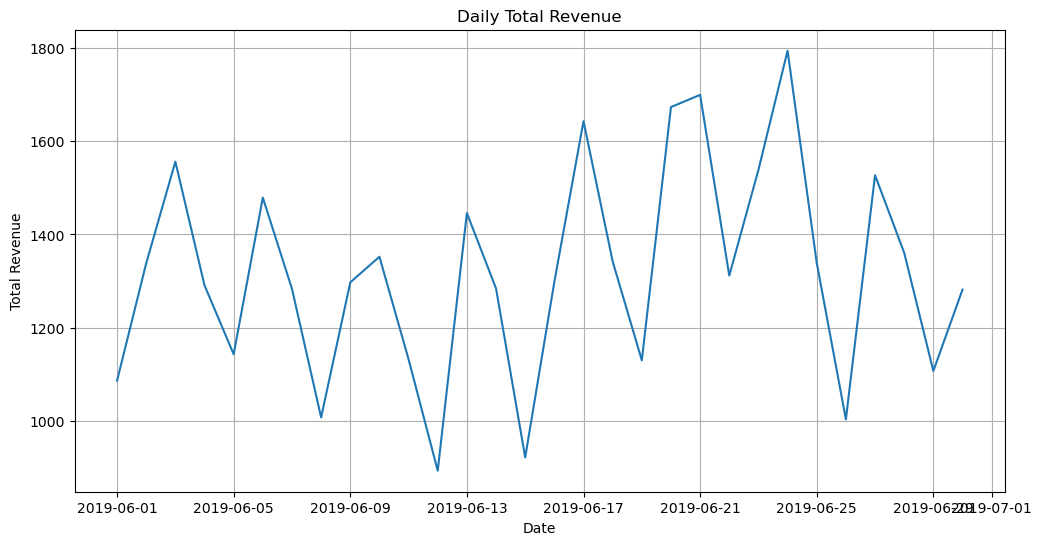

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue.values)
plt.title('Daily Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

In [101]:
from statsmodels.tsa.stattools import adfuller

In [103]:
def check_stationarity(timeseries):
    """Perform Augmented Dickey-Fuller test to check stationarity."""
    result = adfuller(timeseries.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

In [105]:
# Check stationarity
print("Checking stationarity for total_revenue:")
check_stationarity(df_june['total_revenue'])

Checking stationarity for total_revenue:
ADF Statistic: -1.8697977816692204
p-value: 0.3463998066541982
Critical Values:
   1%: -3.769732625845229
   5%: -3.005425537190083
   10%: -2.6425009917355373
The series is NOT stationary.


In [107]:
 # Apply first-order differencing if not stationary
df_june['diff_revenue'] = df_june['total_revenue'].diff()
print("Checking stationarity after differencing:")
check_stationarity(df_june['diff_revenue'])

Checking stationarity after differencing:
ADF Statistic: -2.9040607224229165
p-value: 0.0448778243489134
Critical Values:
   1%: -3.7529275211638033
   5%: -2.998499866852963
   10%: -2.6389669754253307
The series is stationary.


In [79]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [87]:
# Set the Date column as the index
df_june = df.groupby('date').agg({'total_revenue': 'sum'})
df_june.index = pd.to_datetime(df_june.index)

# Explicitly set frequency to daily ('D')
df_june = df_june.asfreq('D')

# Time Series Forecasting with explicit frequency
model = ExponentialSmoothing(df_june['total_revenue'], trend='add', seasonal='add')
model_fit = model.fit()
forecast = model_fit.forecast(31)


In [113]:
# Time Series Forecasting with explicit frequency with differencing
model1 = ExponentialSmoothing(df_june['diff_revenue'].dropna(), trend='add', seasonal='add')
model1_fit = model1.fit()
forecast1 = model1_fit.forecast(31)

In [115]:
# Convert forecast back to original scale
forecast2 = df_june['total_revenue'].iloc[-1] + forecast1.cumsum()

In [89]:
# Revenue range with 20% deviation
lower_bound = forecast * 0.8
upper_bound = forecast * 1.2

In [121]:
print(f'potential revenue range {lower_bound.sum():.2f}-{upper_bound.sum():.2f}')

potential revenue range 31061.99-46592.99


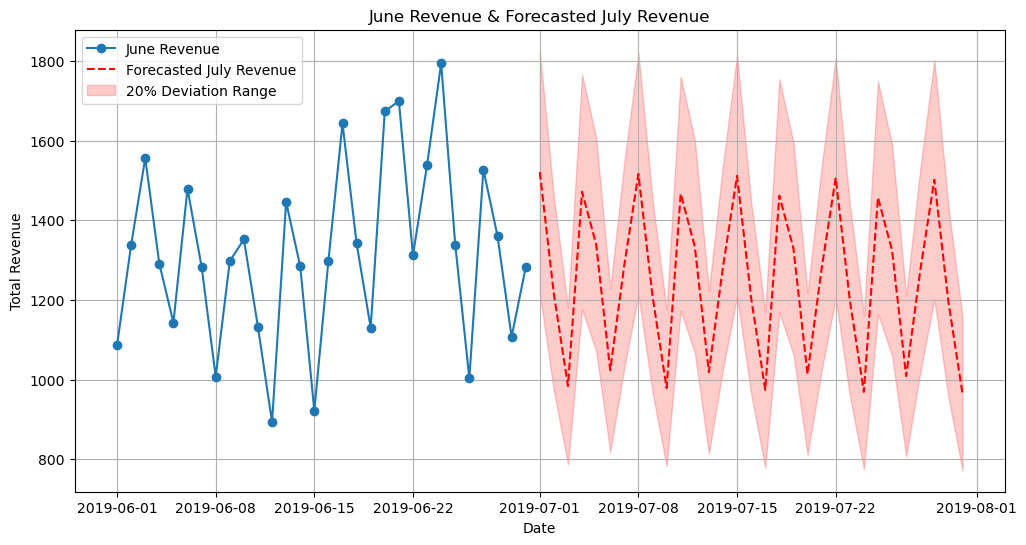

In [99]:
# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(df_june.index, df_june['total_revenue'], label='June Revenue', marker='o')
plt.plot(forecast.index, forecast, label='Forecasted July Revenue', linestyle='dashed', color='red')
plt.fill_between(forecast.index, lower_bound, upper_bound, color='red', alpha=0.2, label='20% Deviation Range')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('June Revenue & Forecasted July Revenue')
plt.legend()
plt.grid()
plt.show()
    

In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.weekday

In [39]:
df


,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent,Day,Weekday
0,2019-06-30,351,10,187,2,84,60,1,4,5174,16,0.0000,2,16,1,30,6
1,2019-06-30,351,10,187,2,84,58,1,4,5174,6,0.0000,0,6,1,30,6
2,2019-06-30,351,10,147,2,84,60,1,4,5174,4,0.0000,0,4,1,30,6
3,2019-06-30,351,10,147,2,84,58,1,4,5174,4,0.0000,0,4,1,30,6
4,2019-06-30,348,10,147,3,79,59,1,19,5138,4,0.0000,0,4,1,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,2019-06-01,350,10,187,3,79,59,1,19,5168,12,0.0254,4,12,1,1,5
567287,2019-06-01,350,10,187,1,79,56,1,19,5168,68,0.3400,52,66,1,1,5
567288,2019-06-01,350,10,158,1,79,56,1,19,5168,2,0.0046,0,2,1,1,5
567289,2019-06-01,350,10,33,1,79,56,1,19,5168,6,0.0120,0,6,1,1,5


In [43]:
# Exploratory Data Analysis (EDA)
print("Data Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     567291 non-null  datetime64[ns]
 1   site_id                  567291 non-null  int64         
 2   ad_type_id               567291 non-null  int64         
 3   geo_id                   567291 non-null  int64         
 4   device_category_id       567291 non-null  int64         
 5   advertiser_id            567291 non-null  int64         
 6   os_id                    567291 non-null  int64         
 7   integration_type_id      567291 non-null  int64         
 8   monetization_channel_id  567291 non-null  int64         
 9   ad_unit_id               567291 non-null  int64         
 10  total_impressions        567291 non-null  int64         
 11  total_revenue            567291 non-null  float64       
 12  v

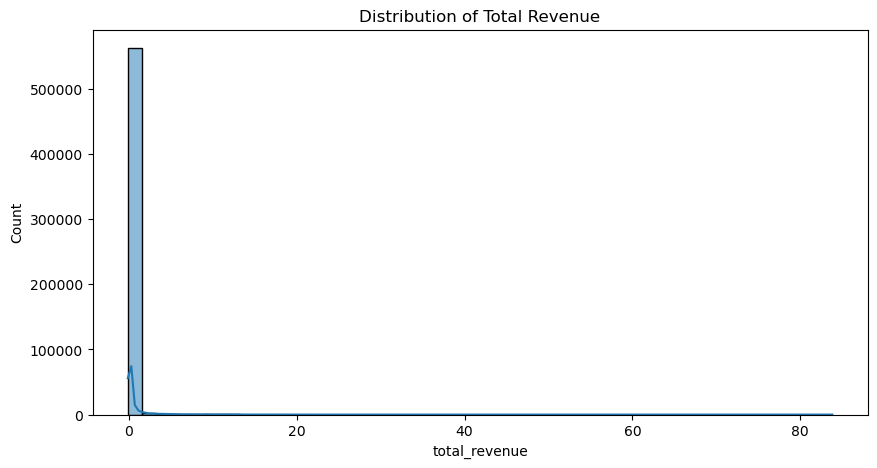

In [47]:
# Distribution of Total Revenue
plt.figure(figsize=(10, 5))
sns.histplot(df['total_revenue'], bins=50, kde=True)
plt.title('Distribution of Total Revenue')
plt.show()

In [49]:
# Feature Engineering
df = df[df['total_impressions'] > 0]
df['CPM'] = (df['total_revenue'] / df['total_impressions']) * 1000

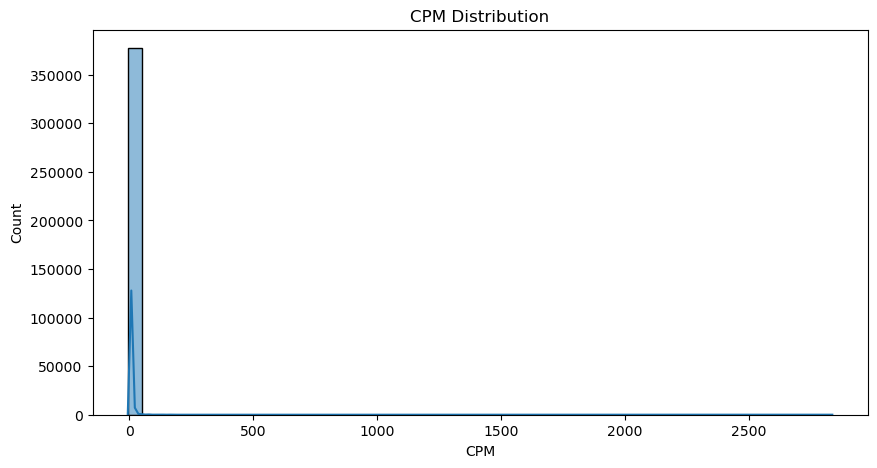

In [51]:
# CPM Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['CPM'], bins=50, kde=True)
plt.title('CPM Distribution')
plt.show()

In [59]:
# Define features and target
features = ['site_id', 'ad_type_id', 'geo_id', 'device_category_id', 'advertiser_id', 'os_id', 'integration_type_id', 'monetization_channel_id', 'ad_unit_id', 'total_impressions', 'viewable_impressions', 'measurable_impressions', 'revenue_share_percent', 'CPM', 'Day', 'Weekday']
target = 'total_revenue'

X = df[features]
y = df[target]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [65]:
y_pred = model.predict(X_test)

In [67]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 0.008685021494857642, RMSE: 0.14439114659274582


In [71]:
min_revenue = np.min(y_july_pred) * 0.8  # 20% deviation
max_revenue = np.max(y_july_pred) * 1.2
reserve_price_range = (min_revenue, max_revenue)
print(f'Reserve Price Range: {reserve_price_range}')

Reserve Price Range: (-0.5519296646118165, 53.541082763671874)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

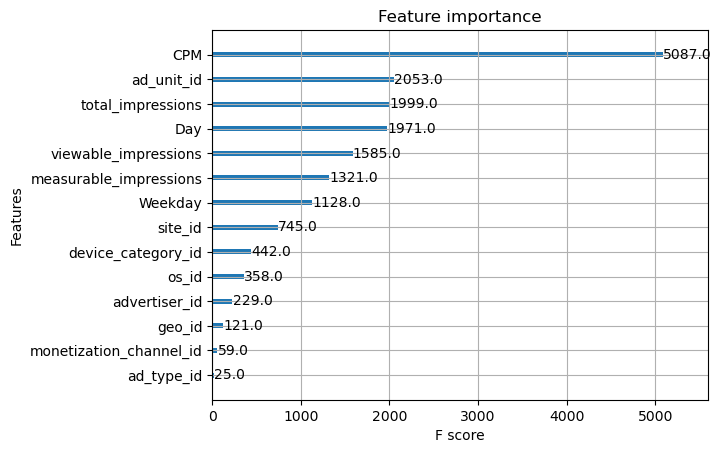

In [73]:
xgb.plot_importance(model)

In [131]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [133]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [153]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [ 300, 500],
    'max_depth': [  7, 12],
    'learning_rate': [ 0.05, 0.1],
    'subsample': [ 0.8, 1.0]
}

In [155]:
# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits



KeyboardInterrupt



In [ ]:
best_xgb = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
best_xgb.fit(X_train, y_train)

In [ ]:
y_july_pred = best_xgb.predict(X_test) 

In [159]:
model_new = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model_new.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [161]:
y_pred = model_new.predict(X_test)

In [163]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 0.008685021494857642, RMSE: 0.14439114659274582


In [167]:
july_data = X.copy()  # Assuming same distribution
y_july_pred = model_new.predict(july_data)

In [171]:
total_revenue_july = np.sum(y_july_pred)
min_revenue = total_revenue_july * 0.8
max_revenue = total_revenue_july * 1.2

print(f"Total Revenue Range for July: (${min_revenue:.2f}, ${max_revenue:.2f})")

Total Revenue Range for July: ($31629.77, $47444.65)


In [205]:
new_df = df.drop(['CPM'], axis=1)

In [207]:
new_df = new_df[new_df['total_impressions'] > 0]
new_df['CPM'] = (new_df['total_revenue'] / new_df['total_impressions']) * 1000


In [209]:
X_all = new_df.drop(['total_revenue', 'CPM','date'], axis=1)
y_all=new_df['CPM']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [213]:
model_new = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model_new.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [215]:
y_pred1 = model_new.predict(X_test)

In [219]:
mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse)
print(f'MAE: {mae1}, RMSE: {rmse1}')

MAE: 1.26847653294657, RMSE: 0.14439114659274582


In [221]:
new_df['predicted_CPM'] = model_new.predict(X_all)

In [223]:
# Calculate the 25th percentile of predicted CPMs
reserve_price = np.percentile(new_df['predicted_CPM'], 25)

print(f"Suggested Reserve Price : ${reserve_price:.2f} CPM")


Suggested Reserve Price : $0.43 CPM


In [225]:
new_df['predicted_CPM'].describe()

count    377753.000000
mean          1.713217
std           2.474054
min         -17.693373
25%           0.434753
50%           1.112121
75%           2.058635
max         627.582642
Name: predicted_CPM, dtype: float64

In [ ]:
"""1️⃣ Ensures Competitive Pricing Without Losing Too Many Bidders
In first-price auctions, advertisers use bid shading (bidding lower than their true value).

If the reserve price is too high, many bidders get excluded, leading to unsold ad space and lost revenue.

If the reserve price is too low, the publisher earns less per impression than they could.

👉 The 25th percentile CPM ensures that only the very lowest bids are filtered out, keeping the auction competitive while increasing revenue."""

In [249]:
categorical_cols = ['site_id', 'ad_type_id', 'device_category_id', 
                           'advertiser_id', 'os_id']
for col in categorical_cols:
    print(f"Unique values in '{col}':", new_df[col].unique())



Unique values in 'site_id': [351 348 350 346 349 345 347 344 343 342]
Unique values in 'ad_type_id': [10 17]
Unique values in 'device_category_id': [2 3 1 5 4]
Unique values in 'advertiser_id': [  84   79    8   88   90   16   96 2634  139 2646 2645 2636 2642 2643
   97 2089 2640 2641 2637 2639 2638 2635 2644]
Unique values in 'os_id': [60 58 59 56 55 57 15]


In [263]:
new_df.groupby('site_id')['predicted_CPM'].describe()

,count,mean,std,min,25%,50%,75%,max
site_id,,,,,,,,
342,16850.0,2.247266,3.086091,-2.013092,0.751858,1.548025,2.822947,172.295013
343,41440.0,1.805402,2.256005,-1.599114,0.537069,1.071472,2.071186,23.248318
344,24083.0,1.664798,2.113405,-1.699124,0.523940,1.109096,2.006526,80.922661
345,39020.0,2.139941,2.769188,-1.941246,0.470035,1.166651,2.326990,24.311125
346,70952.0,1.473011,1.915968,-2.075745,0.439001,0.929313,1.743448,72.157570
347,17894.0,1.880186,2.753543,-2.431299,-0.009506,0.791319,2.837723,34.051476
348,7704.0,1.553671,2.567149,-17.693373,-0.052355,0.383538,2.036546,19.548429
349,34680.0,2.709703,2.899267,-2.193696,0.913507,1.914548,3.439617,143.226181
350,67447.0,1.071464,2.659351,-5.063555,0.333226,0.901851,1.580168,627.582642


In [265]:
new_df.groupby('ad_type_id')['predicted_CPM'].describe()

,count,mean,std,min,25%,50%,75%,max
ad_type_id,,,,,,,,
10,360250.0,1.743351,2.436156,-17.693373,0.499723,1.167477,2.096783,627.582642
17,17503.0,1.093001,3.090874,-5.063555,-0.178157,0.020924,0.317906,14.343002


In [267]:
new_df.groupby('device_category_id')['predicted_CPM'].describe()

,count,mean,std,min,25%,50%,75%,max
device_category_id,,,,,,,,
1,140576.0,1.967581,2.557764,-17.693373,0.579994,1.295283,2.372917,172.295013
2,137918.0,1.542328,2.244928,-5.063555,0.322672,0.820773,1.733494,89.940979
3,97910.0,1.586076,1.686078,-1.599114,0.524942,1.234379,2.077834,74.412407
4,12.0,-0.931866,0.643751,-1.987566,-1.373971,-1.021164,-0.289371,-0.177555
5,1337.0,1.931074,17.404823,-2.496008,0.607841,1.221845,1.841515,627.582642


In [269]:
new_df.groupby('advertiser_id')['predicted_CPM'].describe()

,count,mean,std,min,25%,50%,75%,max
advertiser_id,,,,,,,,
8,10857.0,1.889822,1.085681,-0.553655,1.086575,1.793891,2.516238,31.000195
16,14571.0,2.797584,2.296409,-0.449588,1.586201,2.242791,3.144480,37.902237
79,189531.0,1.242196,2.247853,-2.496008,0.403585,0.945518,1.621870,627.582642
84,4358.0,0.158476,0.757372,-1.743823,-0.250922,0.019700,0.357454,8.805262
88,51150.0,2.115797,2.721579,-2.193696,0.494102,0.991685,2.403544,56.912697
90,20363.0,4.418935,2.734051,-0.510194,2.334653,3.556161,5.872692,38.492004
96,20125.0,2.429435,2.646206,-1.699124,0.508918,1.390347,3.449250,13.842265
97,26428.0,2.641295,3.084670,-1.634403,0.584566,1.255482,3.691702,15.390676
139,2438.0,2.658406,1.242546,0.255572,1.823357,2.445538,3.326438,19.548429


In [271]:
new_df.groupby('os_id')['predicted_CPM'].describe()

,count,mean,std,min,25%,50%,75%,max
os_id,,,,,,,,
15,257.0,1.803342,2.021671,-0.723442,0.786465,1.480032,2.072794,14.847355
55,52791.0,1.862885,1.697666,-1.543565,0.746954,1.541362,2.462570,68.018967
56,141913.0,1.967237,3.054840,-17.693373,0.580377,1.293952,2.364710,627.582642
57,1441.0,1.962834,1.903833,-2.431299,0.684569,1.534428,2.629193,9.731660
58,90325.0,1.683497,2.372838,-1.541600,0.380910,0.902642,1.880725,89.940979
59,45106.0,1.262421,1.613338,-1.599114,0.357692,0.933428,1.597482,74.412407
60,45920.0,1.249046,1.948525,-5.063555,0.182715,0.674590,1.464819,58.271702


In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_25th_percentile_cpm(df, cpm_col='predicted_CPM', categorical_cols=None):
    

    if categorical_cols is None:
        categorical_cols = ['site_id', 'ad_type_id', 'device_category_id', 'advertiser_id', 'os_id']

    cpm_data_list = []  
    sns.set(style="whitegrid")

    for col in categorical_cols:
        # Compute 25th percentile CPM for each unique value in the categorical column
        cpm_summary = df.groupby(col)[cpm_col].describe()
        cpm_25th_percentile = cpm_summary['25%'].reset_index()
        cpm_25th_percentile.columns = [col, '25th_percentile_CPM']
        cpm_25th_percentile.insert(0, 'category', col)  # Add column name for clarity

        # Store data for final DataFrame
        cpm_data_list.append(cpm_25th_percentile)

        # Plot bar chart for 25th percentile CPM
        plt.figure(figsize=(12, 5))
        sns.barplot(x=col, y='25th_percentile_CPM', data=cpm_25th_percentile, palette='coolwarm')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(col)
        plt.ylabel('25th Percentile CPM')
        plt.title(f'25th Percentile CPM per {col}')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Show plot
        plt.show()

    # Combine all results into a single DataFrame
    cpm_final_df = pd.concat(cpm_data_list, ignore_index=True)

    return cpm_final_df




C:\Users\rahul\AppData\Local\Temp\ipykernel_15724\3635171433.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='25th_percentile_CPM', data=cpm_25th_percentile, palette='coolwarm')


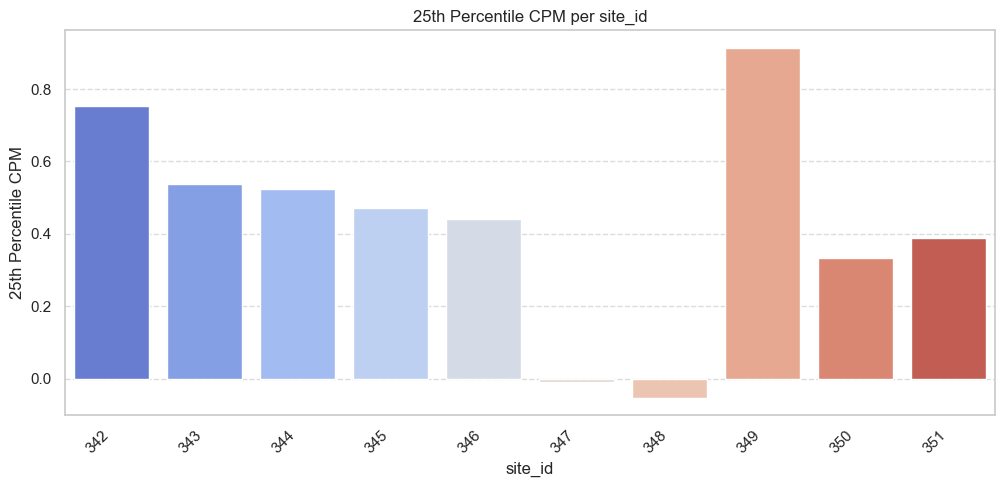

C:\Users\rahul\AppData\Local\Temp\ipykernel_15724\3635171433.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='25th_percentile_CPM', data=cpm_25th_percentile, palette='coolwarm')


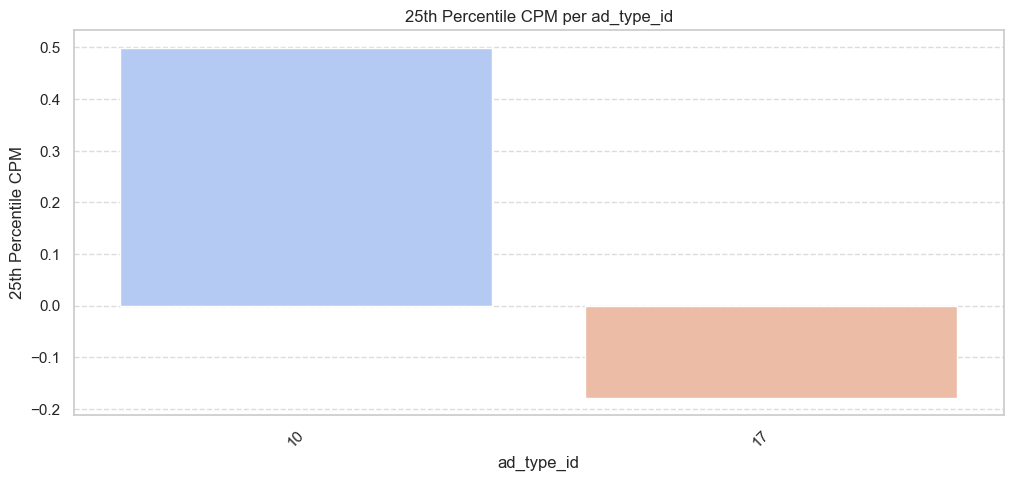

C:\Users\rahul\AppData\Local\Temp\ipykernel_15724\3635171433.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='25th_percentile_CPM', data=cpm_25th_percentile, palette='coolwarm')


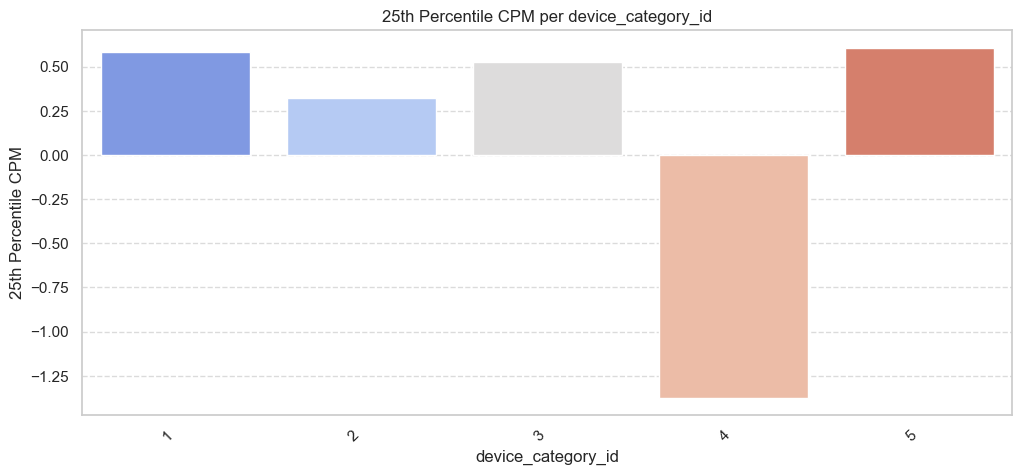

C:\Users\rahul\AppData\Local\Temp\ipykernel_15724\3635171433.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='25th_percentile_CPM', data=cpm_25th_percentile, palette='coolwarm')


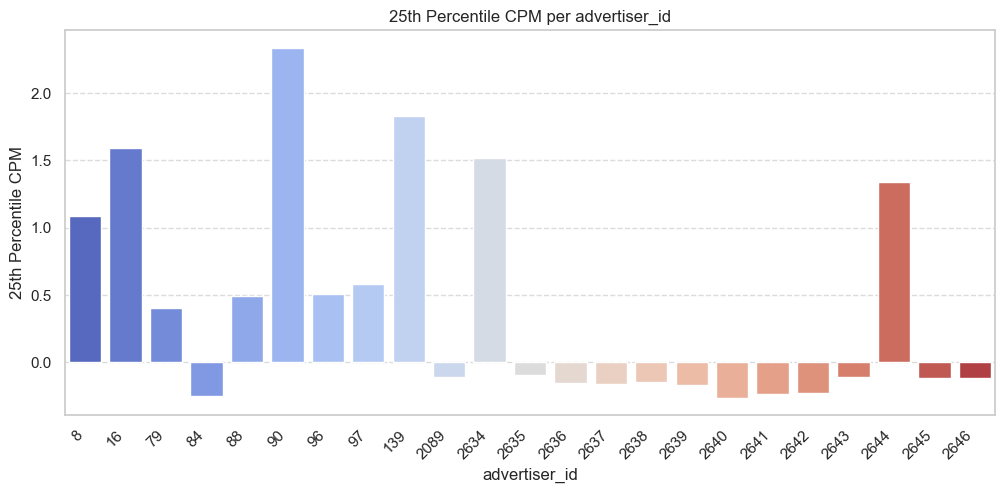

C:\Users\rahul\AppData\Local\Temp\ipykernel_15724\3635171433.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='25th_percentile_CPM', data=cpm_25th_percentile, palette='coolwarm')


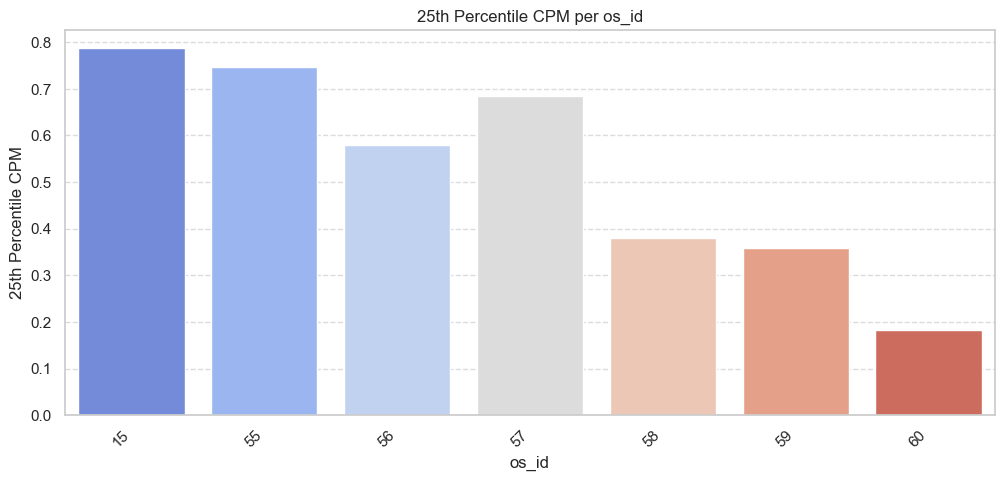

              category  site_id  25th_percentile_CPM  ad_type_id  \
0              site_id    342.0             0.751858         NaN   
1              site_id    343.0             0.537069         NaN   
2              site_id    344.0             0.523940         NaN   
3              site_id    345.0             0.470035         NaN   
4              site_id    346.0             0.439001         NaN   
5              site_id    347.0            -0.009506         NaN   
6              site_id    348.0            -0.052355         NaN   
7              site_id    349.0             0.913507         NaN   
8              site_id    350.0             0.333226         NaN   
9              site_id    351.0             0.388304         NaN   
10          ad_type_id      NaN             0.499723        10.0   
11          ad_type_id      NaN            -0.178157        17.0   
12  device_category_id      NaN             0.579994         NaN   
13  device_category_id      NaN             0.32

In [275]:
# Example usage:
cpm_25th_df = plot_25th_percentile_cpm(new_df)
print(cpm_25th_df)